# GeoPandas Spatial Join

Alexander Bedine  
ajb20dd@fsu.edu  
October 4, 2024  

## Table of Contents 
- [Setting up Environment](#setting-up-environment)
- [Creating a GeoDataFrame](#creating-a-geodataframe)
- [Calculating Total Number of Shelters per County](#calculating-total-number-of-shelters-per-county)
- [Calculating Total Capacity of Shelters per County](#calculating-total-capacity-of-shelters-per-county)
- [Calculating the Total Area of Shelters per County](#calculating-the-total-area-of-shelters-per-county)


### Setting Up Environment

In [1]:
import pandas as pd
import geopandas as gpd

importing pandas and geopandas with appropriate aliases as they will be used in our analysis.

In [2]:
shelter_inventory = pd.read_csv('C:\\Users\\alexb\\Documents\\GIS5103\\GIS5103\\data\\Shelter_inventory.csv')
# shelter_inventory         # validates the data

In [3]:
GeoJSON = "C:\\Users\\alexb\\Documents\\GIS5103\\GIS5103\\data\\Florida_Counties.geojson"

florida_counties = gpd.read_file(GeoJSON)
# florida_counties      # validates the data

create variables **shelter_inventory** and **florida_counties** using the csv and geojson files provided.

### Creating a GeoDataFrame

1. Load the Shelter data and create a GeoDataFrame using the Lat/Long Columns

In [4]:
shelter_inventory.head()

,Name,Address,City,Long,Lat,FACILITY_T,SHELTER_TY,Year_Built,Building,Risk_Capac,Risk_Squar
0,Easton-Newberry Sports Complex,24880 NW 16th Ave,Newberry,-82.604255,29.669064,SHELTER,RISK,2008,1 Main,593,11860
1,University of Florida,3150 Hull Rd,Gainesville,-82.368263,29.638181,SHELTER,RISK,2007,110 Steinbrenner Hall 1st Floor,163,3261
2,Meadowbrook ES,11525 NW 39th Ave,Gainesville,-82.462776,29.688149,SHELTER,RISK,2011,1 Media / Classroom,900,18000
3,Sidney Lanier Center,312 NW 16th Ave,Gainesville,-82.328008,29.666899,SHELTER,RISK,2001,11 Classroom,552,11040
4,Lawton M Chiles ES,2525 School House Rd,Gainesville,-82.445166,29.628691,SHELTER,RISK,1999,3 Cafeteria,266,5320


load **shelter_inventory** and transform into a GeoDataFrame based on the Long/Lat columns

In [5]:
shelter_inventory_gpd = gpd.GeoDataFrame(shelter_inventory, 
                                         geometry=gpd.points_from_xy(shelter_inventory.Long, shelter_inventory.Lat), 
                                         crs="ESRI:102039")

# geometry=gpd.points_from_xy(dataframe.x, dataframe.y) <-- this line specifies which columns of the dataframe are the XY coordinates for the GeoDataFrame

2. Load FL counties data as a GeoDataFrame

In [6]:
florida_counties_gpd = gpd.GeoDataFrame(florida_counties)

# the florida_counties data is already a geoJSON (unlike the shelter_inventory data which was a csv), so it shouldn't require transformation into a GeoDataFrame

3. Transform both GeoDataFrames so both have the same crs

In [7]:
florida_counties_gpd = gpd.GeoDataFrame.set_crs(florida_counties_gpd, 
                                                crs="ESRI:102039", 
                                                allow_override=True)

verify the crs match for both GeoDataFrames

In [8]:
shelter_inventory_gpd.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

In [9]:
florida_counties_gpd.crs

<Projected CRS: ESRI:102039>
Name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United States (USA) - CONUS onshore - Alabama; Arizona; Arkansas; California; Colorado; Connecticut; Delaware; Florida; Georgia; Idaho; Illinois; Indiana; Iowa; Kansas; Kentucky; Louisiana; Maine; Maryland; Massachusetts; Michigan; Minnesota; Mississippi; Missouri; Montana; Nebraska; Nevada; New Hampshire; New Jersey; New Mexico; New York; North Carolina; North Dakota; Ohio; Oklahoma; Oregon; Pennsylvania; Rhode Island; South Carolina; South Dakota; Tennessee; Texas; Utah; Vermont; Virginia; Washington; West Virginia; Wisconsin; Wyoming.
- bounds: (-124.79, 24.41, -66.91, 49.38)
Coordinate Operation:
- name: USA_Contiguous_Albers_Equal_Area_Conic_USGS_version
- method: Albers Equal Area
Datum: North American Datum 1983
- Ellipsoid: GRS 1980
- Prime Meridian: Greenwich

4. Perform spatial join between the shelter GeoDataFrame and the FL counties GeoDataFrame.

In [10]:
florida_counties_shelters = gpd.sjoin(florida_counties_gpd, shelter_inventory_gpd, predicate="contains")
florida_counties_shelters.head()

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry,index_right,Name,Address,City,Long,Lat,FACILITY_T,SHELTER_TY,Year_Built,Building,Risk_Capac,Risk_Squar
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,487300.011359,"POLYGON ((-82.658 29.83, -82.659 29.83, -82.66...",499,Trenton ES,1350 SW SR26,Trenton,-82.830316,29.613548,SHELTER,RISK,2000,2 Cafeteria,262,5240
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,487300.011359,"POLYGON ((-82.658 29.83, -82.659 29.83, -82.66...",504,Trenton HS,1013 N Main St,Trenton,-82.818750,29.619220,SHELTER,RISK,1991,30 Multiprpose,156,3127
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,487300.011359,"POLYGON ((-82.658 29.83, -82.659 29.83, -82.66...",500,Trenton HS,1013 N Main St,Trenton,-82.818750,29.619220,SHELTER,RISK,2000,34 Gym,624,12484
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,487300.011359,"POLYGON ((-82.658 29.83, -82.659 29.83, -82.66...",502,Trenton HS,1013 N Main St,Trenton,-82.818750,29.619220,SHELTER,RISK,1991,28 Classroom,338,6753
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,487300.011359,"POLYGON ((-82.658 29.83, -82.659 29.83, -82.66...",505,Trenton HS,1013 N Main St,Trenton,-82.818750,29.619220,SHELTER,RISK,1991,27 Classroom,347,6931


check for errors in dataframe before proceeding.

In [11]:
florida_counties_shelters.isna().sum()
# output shows no NaN values, so we don't need to run .dropna() function.

OBJECTID         0
DEPCODE          0
COUNTY           0
COUNTYNAME       0
DATESTAMP        0
ShapeSTArea      0
ShapeSTLength    0
geometry         0
index_right      0
Name             0
Address          0
City             0
Long             0
Lat              0
FACILITY_T       0
SHELTER_TY       0
Year_Built       0
Building         0
Risk_Capac       0
Risk_Squar       0
dtype: int64

plot the locations of the shelters over the florida counties map.

<Axes: >

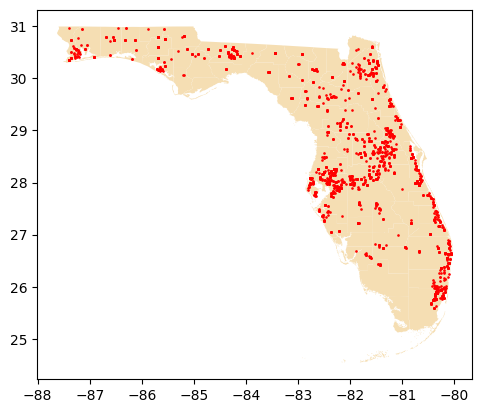

In [12]:
ax = florida_counties_gpd.plot(color="wheat")
shelter_inventory_gpd.plot(ax=ax, color="red", markersize=0.8)

### Calculating Total Number of Shelters per County

create a dataframe that counts the number of shelters by individual counties.

In [13]:
florida_counties_shelters_counts = florida_counties_shelters.groupby("COUNTYNAME").size()
florida_counties_shelters_counts

COUNTYNAME
ALACHUA       25
BAKER         11
BAY           35
BRADFORD       8
BREVARD       98
              ..
UNION          7
VOLUSIA       73
WAKULLA        5
WALTON        16
WASHINGTON    23
Length: 64, dtype: int64

In [14]:
florida_counties_shelters_counts = florida_counties_shelters_counts.reset_index()
florida_counties_shelters_counts

,COUNTYNAME,0
0,ALACHUA,25
1,BAKER,11
2,BAY,35
3,BRADFORD,8
4,BREVARD,98
...,...,...
59,UNION,7
60,VOLUSIA,73
61,WAKULLA,5
62,WALTON,16


creating variable **florida_counties_shelters_counts** to collect the number of shelters by county. Variable named **n_shelters**

In [15]:
florida_counties_shelters_counts = florida_counties_shelters_counts.rename(columns={0:'n_shelters'})
florida_counties_shelters_counts

,COUNTYNAME,n_shelters
0,ALACHUA,25
1,BAKER,11
2,BAY,35
3,BRADFORD,8
4,BREVARD,98
...,...,...
59,UNION,7
60,VOLUSIA,73
61,WAKULLA,5
62,WALTON,16


merge this **n_shelter** variable onto the main **florida_counties_gpd** dataframe so it is usable for spatial analysis.

In [16]:
florida_counties_shelters_per_county = florida_counties_gpd.merge(florida_counties_shelters_counts, on="COUNTYNAME", how="left")
florida_counties_shelters_per_county

,OBJECTID,DEPCODE,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea,ShapeSTLength,geometry,n_shelters
0,1,21,041,GILCHRIST,2000-05-16 00:00:00+00:00,9.908353e+09,4.873000e+05,"POLYGON ((-82.658 29.83, -82.659 29.83, -82.66...",9.0
1,2,54,107,PUTNAM,2000-05-16 00:00:00+00:00,2.305869e+10,7.629677e+05,"POLYGON ((-81.581 29.84, -81.606 29.84, -81.62...",12.0
2,3,62,123,TAYLOR,2000-05-16 00:00:00+00:00,2.891747e+10,8.772527e+05,"MULTIPOLYGON (((-83.73 30.304, -83.74 30.303, ...",11.0
3,4,46,091,OKALOOSA,2000-05-16 00:00:00+00:00,2.562159e+10,1.087058e+06,"MULTIPOLYGON (((-86.392 30.65, -86.392 30.652,...",22.0
4,5,7,013,CALHOUN,2000-05-16 00:00:00+00:00,1.604809e+10,6.313440e+05,"POLYGON ((-84.933 30.606, -84.957 30.606, -84....",10.0
...,...,...,...,...,...,...,...,...,...
62,63,17,033,ESCAMBIA,2000-05-16 00:00:00+00:00,1.915206e+10,1.448408e+06,"MULTIPOLYGON (((-87.231 30.997, -87.238 30.997...",51.0
63,64,47,093,OKEECHOBEE,2000-05-16 00:00:00+00:00,2.484427e+10,8.939740e+05,"POLYGON ((-80.679 27.558, -80.679 27.558, -80....",7.0
64,65,19,037,FRANKLIN,2000-05-16 00:00:00+00:00,1.558955e+10,1.467125e+06,"MULTIPOLYGON (((-84.667 30.012, -84.71 30.012,...",NaN
65,66,1,001,ALACHUA,2000-05-16 00:00:00+00:00,2.702324e+10,8.927266e+05,"POLYGON ((-82.419 29.923, -82.419 29.923, -82....",25.0


mapping the number of shelters per county.

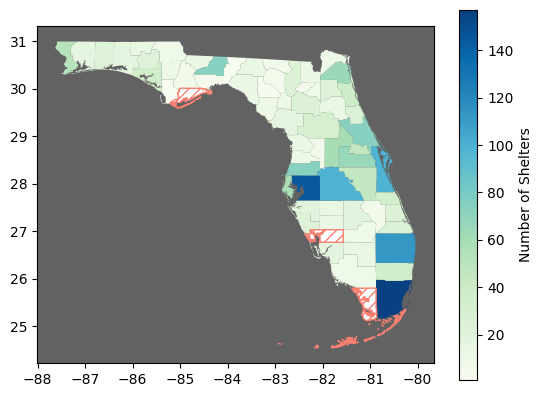

In [26]:
FL_shelters_per_county_map = florida_counties_shelters_per_county.plot(column='n_shelters', 
                                          legend=True, 
                                          legend_kwds={"label": "Number of Shelters"},
                                          missing_kwds={"color": "#FFFFFF", "edgecolor": "salmon", "hatch": "///", "label": "Missing values"},
                                          cmap="GnBu")

FL_shelters_per_county_map.set_facecolor('#626262')

### Calculating Total Capacity of Shelters per County

create variable **florida_counties_shelters_capacity** that sums the capacity of shelters by county.

In [18]:
florida_counties_shelters_capacity = florida_counties_shelters.groupby("COUNTYNAME").sum('Risk_Capac')
florida_counties_shelters_capacity

,OBJECTID,DEPCODE,ShapeSTArea,ShapeSTLength,index_right,Long,Lat,Year_Built,Risk_Capac,Risk_Squar
COUNTYNAME,,,,,,,,,,
ALACHUA,1650,25,6.755810e+11,2.231816e+07,300,-2060.041820,741.484002,50002,11862,240992
BAKER,187,22,1.799838e+11,6.629890e+06,330,-903.429280,333.177298,22011,3312,66228
BAY,525,105,7.294812e+11,6.421455e+07,5538,-2997.617205,1058.644286,67907,10893,231026
BRADFORD,320,32,6.687890e+10,4.386613e+06,4242,-656.972003,239.516337,15978,1303,32549
BREVARD,4116,490,2.835821e+12,2.548556e+08,12320,-7911.315872,2763.666630,195672,49713,994220
...,...,...,...,...,...,...,...,...,...,...
UNION,273,441,4.874376e+10,2.944505e+06,12780,-576.401858,210.125097,13951,1682,36740
VOLUSIA,1825,4672,2.456132e+12,1.341693e+08,134888,-5926.542942,2119.912212,141855,22695,472544
WAKULLA,205,325,8.511253e+10,4.583669e+06,9375,-421.961100,150.911250,10000,423,8461


merge this information with the main **florida_counties_gpd** dataframe so it is usable for spatial analysis.

In [19]:
florida_counties_shelters_capacity_by_county = florida_counties_gpd.merge(florida_counties_shelters_capacity, on="COUNTYNAME", how="left")
florida_counties_shelters_capacity_by_county.tail()

,OBJECTID_x,DEPCODE_x,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea_x,ShapeSTLength_x,geometry,OBJECTID_y,DEPCODE_y,ShapeSTArea_y,ShapeSTLength_y,index_right,Long,Lat,Year_Built,Risk_Capac,Risk_Squar
62,63,17,033,ESCAMBIA,2000-05-16 00:00:00+00:00,1.915206e+10,1.448408e+06,"MULTIPOLYGON (((-87.231 30.997, -87.238 30.997...",3213.0,867.0,9.767551e+11,7.386883e+07,22185.0,-4452.901235,1555.250470,101791.0,26863.0,532087.0
63,64,47,093,OKEECHOBEE,2000-05-16 00:00:00+00:00,2.484427e+10,8.939740e+05,"POLYGON ((-80.679 27.558, -80.679 27.558, -80....",448.0,329.0,1.739099e+11,6.257818e+06,8162.0,-565.863217,190.590190,14008.0,2015.0,40314.0
64,65,19,037,FRANKLIN,2000-05-16 00:00:00+00:00,1.558955e+10,1.467125e+06,"MULTIPOLYGON (((-84.667 30.012, -84.71 30.012,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,66,1,001,ALACHUA,2000-05-16 00:00:00+00:00,2.702324e+10,8.927266e+05,"POLYGON ((-82.419 29.923, -82.419 29.923, -82....",1650.0,25.0,6.755810e+11,2.231816e+07,300.0,-2060.041820,741.484002,50002.0,11862.0,240992.0
66,67,55,109,ST. JOHNS,2000-05-16 00:00:00+00:00,1.784792e+10,1.130720e+06,"MULTIPOLYGON (((-81.378 30.108, -81.378 30.112...",2479.0,2035.0,6.603729e+11,4.183663e+07,59041.0,-3016.937267,1110.033348,74025.0,18856.0,382440.0


create the map that shows the total shelter capacity by county.

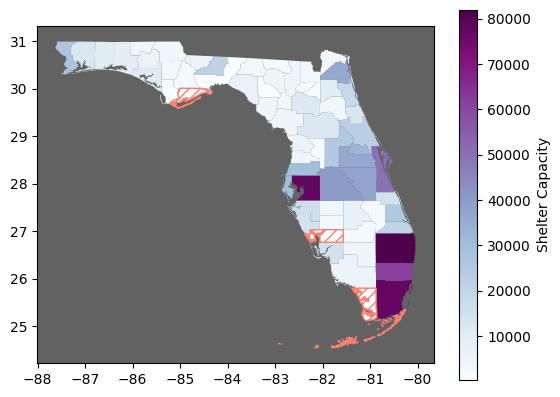

In [25]:
FL_shelters_county_capacity_map = florida_counties_shelters_capacity_by_county.plot(column='Risk_Capac', 
                                          legend=True, 
                                          legend_kwds={"label": "Shelter Capacity"},
                                          missing_kwds={"color": "#FFFFFF", "edgecolor": "salmon", "hatch": "///", "label": "Missing values"},
                                          cmap="BuPu")

FL_shelters_county_capacity_map.set_facecolor('#626262')

### Calculating the Total Area of Shelters per County

create a new dataframe that sums the total area of shelters within given counties.

In [21]:
florida_counties_shelters_area = florida_counties_shelters.groupby("COUNTYNAME").sum('Risk_Squar')
florida_counties_shelters_area

,OBJECTID,DEPCODE,ShapeSTArea,ShapeSTLength,index_right,Long,Lat,Year_Built,Risk_Capac,Risk_Squar
COUNTYNAME,,,,,,,,,,
ALACHUA,1650,25,6.755810e+11,2.231816e+07,300,-2060.041820,741.484002,50002,11862,240992
BAKER,187,22,1.799838e+11,6.629890e+06,330,-903.429280,333.177298,22011,3312,66228
BAY,525,105,7.294812e+11,6.421455e+07,5538,-2997.617205,1058.644286,67907,10893,231026
BRADFORD,320,32,6.687890e+10,4.386613e+06,4242,-656.972003,239.516337,15978,1303,32549
BREVARD,4116,490,2.835821e+12,2.548556e+08,12320,-7911.315872,2763.666630,195672,49713,994220
...,...,...,...,...,...,...,...,...,...,...
UNION,273,441,4.874376e+10,2.944505e+06,12780,-576.401858,210.125097,13951,1682,36740
VOLUSIA,1825,4672,2.456132e+12,1.341693e+08,134888,-5926.542942,2119.912212,141855,22695,472544
WAKULLA,205,325,8.511253e+10,4.583669e+06,9375,-421.961100,150.911250,10000,423,8461


create a merge on the **florida_counties_gpd** dataframe that has this total area for every county included.

In [22]:
florida_counties_shelters_area_by_county = florida_counties_gpd.merge(florida_counties_shelters_area, on="COUNTYNAME", how="left")
florida_counties_shelters_area_by_county.tail()

,OBJECTID_x,DEPCODE_x,COUNTY,COUNTYNAME,DATESTAMP,ShapeSTArea_x,ShapeSTLength_x,geometry,OBJECTID_y,DEPCODE_y,ShapeSTArea_y,ShapeSTLength_y,index_right,Long,Lat,Year_Built,Risk_Capac,Risk_Squar
62,63,17,033,ESCAMBIA,2000-05-16 00:00:00+00:00,1.915206e+10,1.448408e+06,"MULTIPOLYGON (((-87.231 30.997, -87.238 30.997...",3213.0,867.0,9.767551e+11,7.386883e+07,22185.0,-4452.901235,1555.250470,101791.0,26863.0,532087.0
63,64,47,093,OKEECHOBEE,2000-05-16 00:00:00+00:00,2.484427e+10,8.939740e+05,"POLYGON ((-80.679 27.558, -80.679 27.558, -80....",448.0,329.0,1.739099e+11,6.257818e+06,8162.0,-565.863217,190.590190,14008.0,2015.0,40314.0
64,65,19,037,FRANKLIN,2000-05-16 00:00:00+00:00,1.558955e+10,1.467125e+06,"MULTIPOLYGON (((-84.667 30.012, -84.71 30.012,...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
65,66,1,001,ALACHUA,2000-05-16 00:00:00+00:00,2.702324e+10,8.927266e+05,"POLYGON ((-82.419 29.923, -82.419 29.923, -82....",1650.0,25.0,6.755810e+11,2.231816e+07,300.0,-2060.041820,741.484002,50002.0,11862.0,240992.0
66,67,55,109,ST. JOHNS,2000-05-16 00:00:00+00:00,1.784792e+10,1.130720e+06,"MULTIPOLYGON (((-81.378 30.108, -81.378 30.112...",2479.0,2035.0,6.603729e+11,4.183663e+07,59041.0,-3016.937267,1110.033348,74025.0,18856.0,382440.0


create a map that shows the square area of the shelters by county.

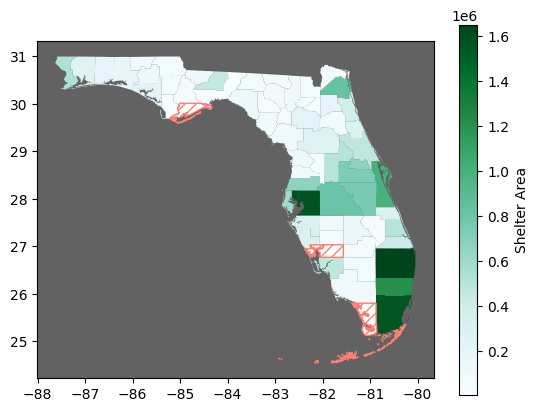

In [27]:
FL_shelters_county_area_map = florida_counties_shelters_capacity_by_county.plot(column='Risk_Squar', 
                                          legend=True, 
                                          legend_kwds={"label": "Shelter Area"},
                                          missing_kwds={"color": "#FFFFFF", "edgecolor": "salmon", "hatch": "///", "label": "Missing values"},
                                          cmap="BuGn")

FL_shelters_county_area_map.set_facecolor('#626262')